# 1. Loading Packages

In [281]:
import pandas as pd #data manipulation
import numpy as np # for math calculations
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # plotting graphs
%matplotlib inline
import warnings #to ignore any warnings
warnings.filterwarnings('ignore')

# 2. Reading Data

In [282]:
train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')
train_original = train.copy() # copy the original file in case we have to make any changes
test_original = test.copy()

# 3. EDA

## 3.1 Understanding the Data

In [283]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [284]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002086,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [285]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [286]:
train.shape

(614, 13)

## 3.2 Univariate Analysis

In [287]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

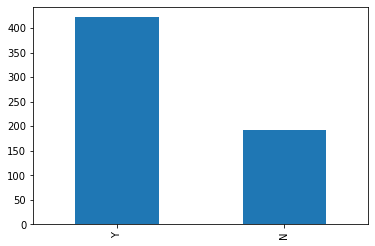

In [288]:
#frequency table
train.Loan_Status.value_counts().plot.bar();

#### The loan of 422 (around 69%) people out of 614 was approved.

### 3.2.1 Independent Varibale (Categorical)

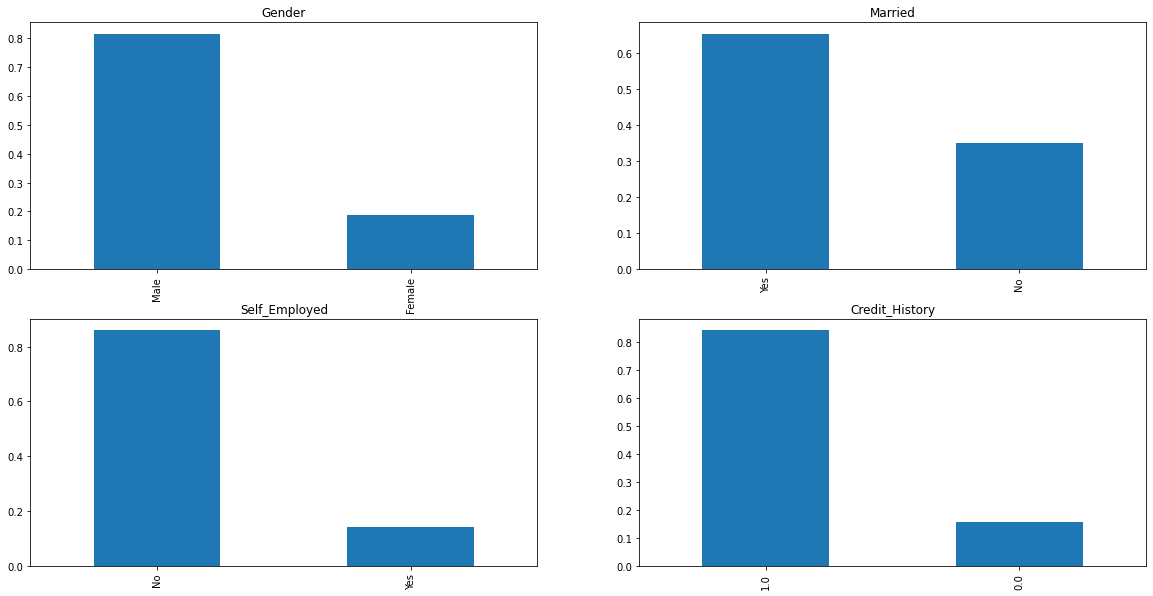

In [289]:
plt.figure()
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History');

#### From the plots, 80% of the applicants were male, 65% were married, 15% were self-employed 
#### and 85% repaid their debts.

### 3.2.2 Independent Varibale (Numerical)

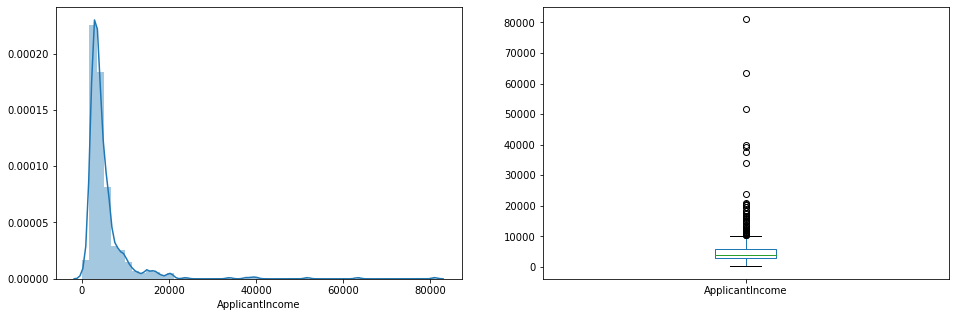

In [290]:
# let's check the distribution of income first.
plt.figure(); plt.subplot(121); sns.distplot(train['ApplicantIncome'])
plt.subplot(122); train['ApplicantIncome'].plot.box(figsize=(16,5));

#### Income feature is right skewed (not normally distributed) and has many outliers(from the boxplot)

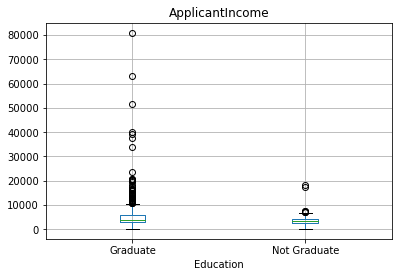

In [291]:
train.boxplot(column='ApplicantIncome', by='Education'); plt.suptitle("");

#### We can see that there are a higher number of graduates with very high incomes, 
#### which are appearing to be the outliers.

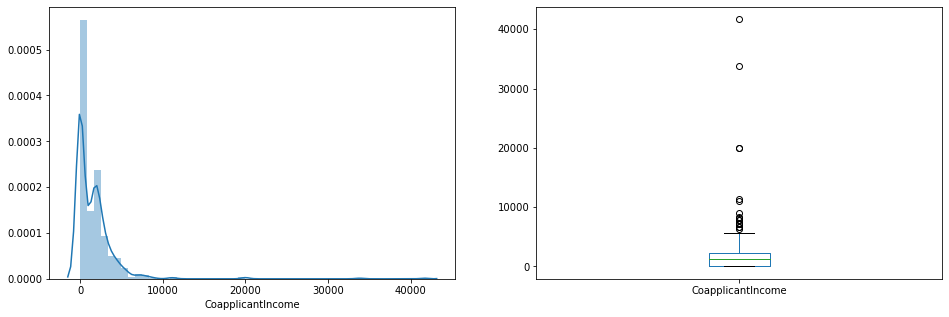

In [292]:
#Let's look at the Coapplicant income distribution
plt.figure(); plt.subplot(121); sns.distplot(train['CoapplicantIncome'])
plt.subplot(122); train['CoapplicantIncome'].plot.box(figsize=(16,5));

#### We see a lot fo outliers in this variable and the distribution is fairly normal

## 3.3 Bivariate Analysis
Let's check the correlation btw independent variables and target

### 3.3.1 Categorical Varibales vs Target

#### First I will find the relation btw target and categorical variables with stacked bar plot

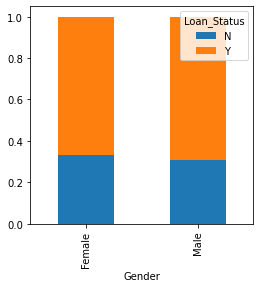

In [293]:
Gender = pd.crosstab(train.Gender, train.Loan_Status)
Gender.div(Gender.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4));

### We can infer that the proportion of male and female applicants is more or less same for both approved and unapproved loans

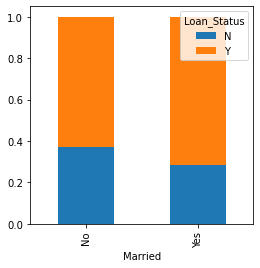

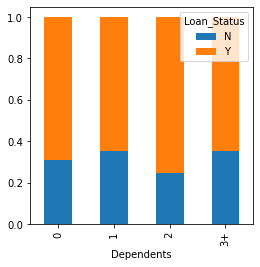

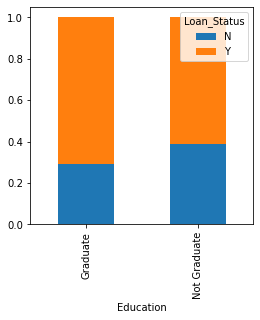

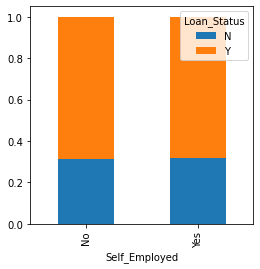

In [294]:
# Now lets visualize the remaining categorical variable vs target variable.
Married = pd.crosstab(train.Married, train.Loan_Status)
Dependents = pd.crosstab(train.Dependents, train.Loan_Status)
Education = pd.crosstab(train.Education, train.Loan_Status)
Self_Employed = pd.crosstab(train.Self_Employed, train.Loan_Status)
Married.div(Married.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4))
Dependents.div(Dependents.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4));
Education.div(Education.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4));
Self_Employed.div(Self_Employed.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4));

In [295]:
#Proportion of married applicants was higher for the approved loans.
#There was nothing significant I could inform from the other variables

In [296]:
#Now I will look at the rest of the categorical variables.

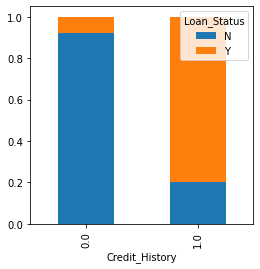

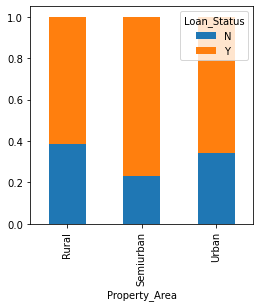

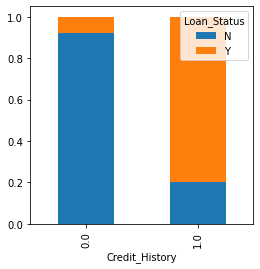

In [297]:
# Now lets visualize the remaining categorical variable vs target variable.
Credit_History = pd.crosstab(train.Credit_History, train.Loan_Status)
Property_Area = pd.crosstab(train.Property_Area, train.Loan_Status)
Credit_History = pd.crosstab(train.Credit_History, train.Loan_Status)
Credit_History.div(Credit_History.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4))
Property_Area.div(Property_Area.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4));
Credit_History.div(Credit_History.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4));

#### It seems people with credit history as 1 are more likely to get their loans approved. Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas

### 3.3.2 Numerical Varibales vs Target

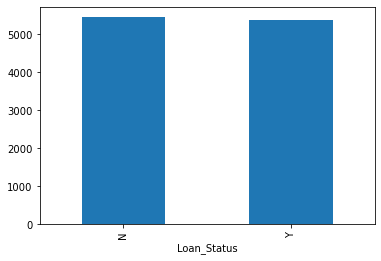

In [298]:
# We'll try to find mean income of the people for which the loan has approved and not approved
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

#### I compared the mean income of the people for which the loan has approved and not approved. There was no significant difference, then I made bins for the applicant income variable based on values in it and analyze the corresponding loan status for each bin. (0,2500,4000,6000,81000)

In [299]:
bins=[0,2500,4000,6000,81000]; group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

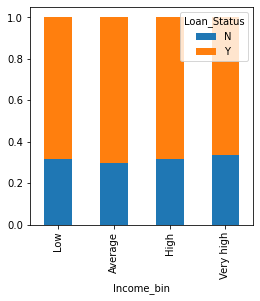

In [300]:
Income_bin = pd.crosstab(train.Income_bin, train.Loan_Status)
Income_bin.div(Income_bin.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4))

In [301]:
#Applicant's income does not affect the chances of loan approval which counteraddicts our hypothesis

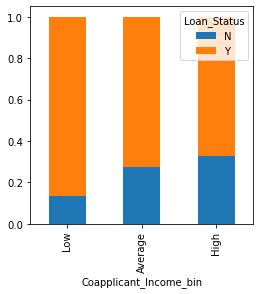

In [302]:
bins=[0,1000,3000,42000]; group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train.Coapplicant_Income_bin, train.Loan_Status)
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4))

In [303]:
#It shows that lower the coapplicant's income higher the chance of loan approval,
#this does not make chance. The possible reason may be that most applicants do not have any
#coapplicant so their values are 0, hence loan approval does not depend on it.
#Let's create new variable and combine applicant and coapplicant incomes.

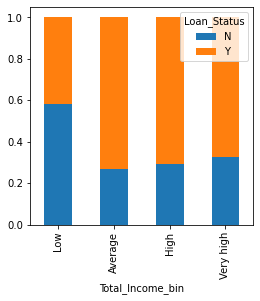

In [304]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]; group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train.Total_Income_bin, train.Loan_Status)
Total_Income_bin.div(Total_Income_bin.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4))

In [305]:
#Now we can see that proportion of loans getting approved for applicants having low Total_Income
#is very less.

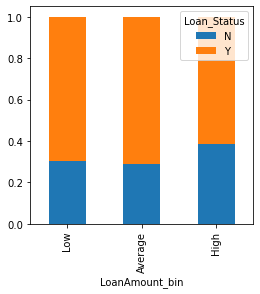

In [306]:
#Let's visualize the loan amount.
bins=[0,100,200,700]; group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train.LoanAmount_bin, train.Loan_Status)
LoanAmount_bin.div(LoanAmount_bin.sum('columns').astype(float), axis=0).plot(kind='bar', stacked='True', figsize=(4,4))

In [307]:
#Proportion of approved loans is higher for Low and Average Loan Amount as compared to that of 
#High Loan amount.

In [308]:
#Let's drop the bins we created for the exploration part.
#Also, convert non-numerical values to numerical

In [309]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin',
                   'Total_Income'],axis=1)

In [310]:
train['Dependents'].replace('3+',3,inplace=True);test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)
test['Loan_Status'].replace({'Y':1,'N':0},inplace=True);


In [311]:
#Now let's look at the correlation btw all numerical variables.

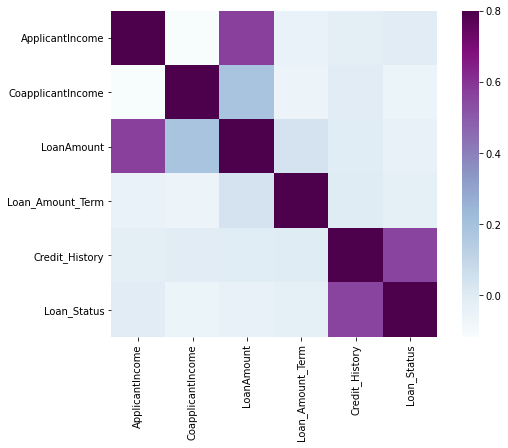

In [312]:
matrix = train.corr(); f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True,cmap='BuPu')

In [313]:
#We see that most correlated variables are ApplicantIncome, Credit History and CoapplicantIncome

# 4. Data Preparation

## 4.1 Missing Value Treatment

In [314]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [315]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [316]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [317]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [318]:
#We'll use median for LoanAmount variables, since it is highly effected by the outliers.

In [319]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [320]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [321]:
#Let's fill missing values in test dataset.
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

## 4.2 Outlier Treatment

In [322]:
#We'll take the log transformation. It does not affect the smaller values much, but reduces
#the larger values.

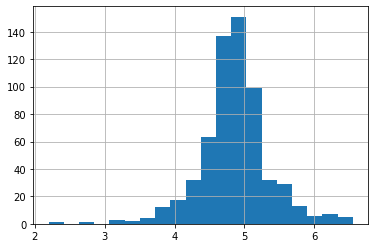

In [323]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
#for test data
test['LoanAmount_log'] = np.log(test['LoanAmount'])


In [324]:
# del train['LoanAmount']
# del test['LoanAmount']

In [325]:
#now the distribution looks much closer to normal and effect of extreme values has been 
#significantly subsided.

## 4.3 Preprocessing

In [326]:
#Let's drop ApplicationID, it does not have any effect

In [327]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [328]:
#Split the train set
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

In [329]:
train.shape

(614, 13)

In [330]:
test.shape

(614, 13)

In [331]:
#Converting categorical variables to numerical.
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 5. Model Selection

In [332]:
#Train-Validation Split

In [333]:
from sklearn.model_selection import train_test_split

In [334]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=42)

In [335]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [336]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [337]:
pred_cv = model.predict(X_cv)

In [338]:
accuracy_score(y_cv, pred_cv)

0.7389162561576355

In [339]:
#Prediction for the test set

In [340]:
pred_test = model.predict(test.drop('Loan_Status',axis=1))

In [341]:
accuracy_score(test['Loan_Status'],pred_test)

0.7785016286644951

In [342]:
#Let's apply Stratified CV technique

In [343]:
from sklearn.model_selection import StratifiedKFold
i=1; kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test.drop('Loan_Status',axis=1))
    pred = model.predict_proba(xvl)[:,1]



1 of kfold5
accuracy_score 0.8048780487804879

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7804878048780488

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7950819672131147


In [344]:
#mean validation accuracy for this model turns out to be 0.81

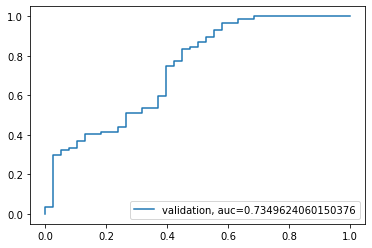

In [345]:
#Let's visualize the ROC Curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.plot(fpr,tpr,label = 'validation, auc='+str(auc))
plt.legend(loc=4);

# 6. Feature Engineering

In [346]:
#Based on domain knowledge, we can come up with new features that might affect target variable.

In [347]:
train['Total_Income'] = train.ApplicantIncome + train.CoapplicantIncome
test['Total_Income'] = test.ApplicantIncome + train.CoapplicantIncome

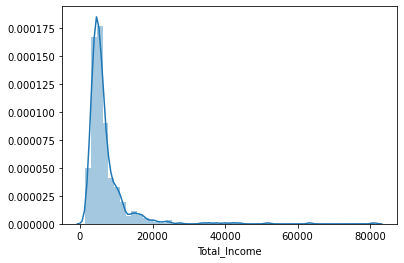

In [348]:
#let's check the distribution
sns.distplot(train.Total_Income)

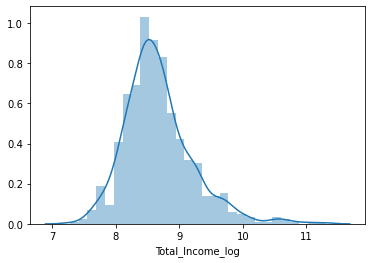

In [349]:
# It is right skewed. Let's take the log
train['Total_Income_log'] = np.log(train['Total_Income'])

test['Total_Income_log'] = np.log(test['Total_Income'])

sns.distplot(train['Total_Income_log'])

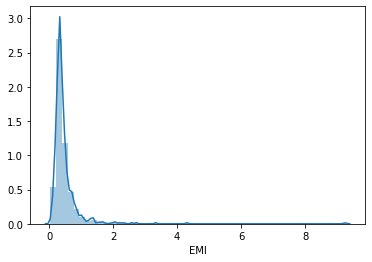

In [352]:
#Let's create the EMI variable. 
train['EMI'] = train.LoanAmount /train.Loan_Amount_Term
test['EMI'] = test.LoanAmount /train.Loan_Amount_Term 
sns.distplot(train.EMI);

In [353]:
#Let's create Balance Income feature and check its distribution 
train['Balance_Income'] = train.Total_Income - (train['EMI']*1000) 
#Multiply with 1000 to make the units equal
test['Balance_Income'] = test.Total_Income - (train['EMI']*1000) 


In [355]:
#Let's now drop the variables which we used to create these new feature, or they will be 
#highly correlated
del train['LoanAmount']
del test['LoanAmount']
del train['ApplicantIncome']
del test['ApplicantIncome']
del train['CoapplicantIncome']
del test['CoapplicantIncome']


In [356]:
#Besides we must drop Total_Income after creating its loged values as a new variable
del train['Total_Income']
del test['Total_Income']

In [357]:
train.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income_log', 'EMI', 'Balance_Income'],
      dtype='object')

# 7. Model Selection cont.

In [358]:
#Let's prepare data for feeding into the models
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

### Logistic Regression

In [367]:
from sklearn.model_selection import StratifiedKFold
i=1; kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
mean_accuracy = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test.drop('Loan_Status',axis=1))
    pred = model.predict_proba(xvl)[:,1]
    mean_accuracy.append(score)



1 of kfold5
accuracy_score 0.6910569105691057

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7317073170731707

4 of kfold5
accuracy_score 0.7723577235772358

5 of kfold5
accuracy_score 0.7868852459016393


In [373]:
k=0
for i in mean_accuracy:
    k+=i
print('mean accuracy is', k/5)

mean accuracy is 0.7638811142209783


### Decision Tree

In [380]:
from sklearn import tree
i=1; kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
mean_accuracy = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test.drop('Loan_Status',axis=1))
    pred = model.predict_proba(xvl)[:,1]
    mean_accuracy.append(score)
k=0
for i in mean_accuracy:
    k+=i
print('\n')
print('mean accuracy is', k/5)


1 of kfold5
accuracy_score 0.6991869918699187

2 of kfold5
accuracy_score 0.7398373983739838

3 of kfold5
accuracy_score 0.7642276422764228

4 of kfold5
accuracy_score 0.7642276422764228

5 of kfold5
accuracy_score 0.6557377049180327


mean accuracy is 0.7246434759429561


### Random Forest

In [381]:
from sklearn.ensemble import RandomForestClassifier
i=1; kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
mean_accuracy = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test.drop('Loan_Status',axis=1))
    pred = model.predict_proba(xvl)[:,1]
    mean_accuracy.append(score)
k=0
for i in mean_accuracy:
    k+=i
print('\n')
print('mean accuracy is', k/5)


1 of kfold5
accuracy_score 0.8211382113821138

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7886178861788617

4 of kfold5
accuracy_score 0.7886178861788617

5 of kfold5
accuracy_score 0.7868852459016393


mean accuracy is 0.8045315207250432


In [382]:
#I will try to improve the accuracy by tuning the hyperparameters for this model.
# I will use grid search to get the optimized values for the hyperparameters.

In [384]:
from sklearn.model_selection import GridSearchCV
#provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an 
#interval of 20 for n_estimators.
paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=42)


In [387]:
#fir the model
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [389]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=101, random_state=1)

In [390]:
from sklearn.ensemble import RandomForestClassifier
i=1; kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
mean_accuracy = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=101)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test.drop('Loan_Status',axis=1))
    pred = model.predict_proba(xvl)[:,1]
    mean_accuracy.append(score)
k=0
for i in mean_accuracy:
    k+=i
print('\n')
print('mean accuracy is', k/5)


1 of kfold5
accuracy_score 0.8130081300813008

2 of kfold5
accuracy_score 0.8373983739837398

3 of kfold5
accuracy_score 0.7886178861788617

4 of kfold5
accuracy_score 0.8048780487804879

5 of kfold5
accuracy_score 0.7950819672131147


mean accuracy is 0.807796881247501


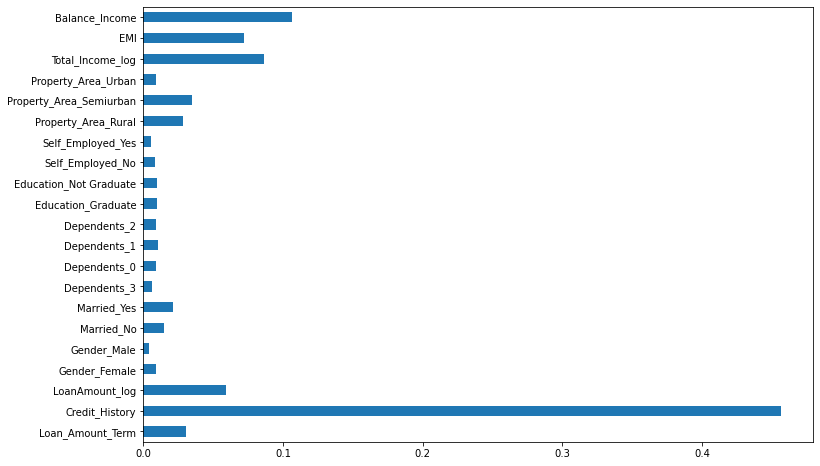

In [392]:
#let's find the feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

### XGBoost

In [397]:
from xgboost import XGBClassifier
i=1; kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True) 
mean_accuracy = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test.drop('Loan_Status',axis=1))
    pred = model.predict_proba(xvl)[:,1]
    mean_accuracy.append(score)
k=0
for i in mean_accuracy:
    k+=i
print('\n')
print('mean accuracy is', k/5)

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/hakanp/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/hakanp/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
